# SMS Spam Collection Dataset

**SMS Spam**

**SMS spam (sometimes called cell phone spam) is any junk message delivered to a mobile phone as text messaging through the Short Message Service (SMS). The practice is fairly rare in North America, but has been common in Japan for years.**


# IMPORTING THE LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# LOADING THE DATASET

In [4]:
data=pd.read_csv(r'/content/drive/MyDrive/spam1.csv' , encoding = 'cp1252')


In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
6772,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
6773,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
6774,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
data.var()

Series([], dtype: float64)

In [8]:
data.mean()

Series([], dtype: float64)

In [9]:
data.describe().transpose()


,count,unique,top,freq
v1,6776,2,ham,5854
v2,6776,5165,"Sorry, I'll call later",38
Unnamed: 2,56,43,PO Box 5249,4
Unnamed: 3,16,10,"MK17 92H. 450Ppw 16""",4
Unnamed: 4,8,5,"just Keep-in-touch\"" gdeve..""",3


In [10]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,6776,6776,56,16,8
unique,2,5165,43,10,5
top,ham,"Sorry, I'll call later",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,5854,38,4,4,3


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6776 entries, 0 to 6775
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          6776 non-null   object
 1   v2          6776 non-null   object
 2   Unnamed: 2  56 non-null     object
 3   Unnamed: 3  16 non-null     object
 4   Unnamed: 4  8 non-null      object
dtypes: object(5)
memory usage: 264.8+ KB


In [12]:
data.shape   #5572 rows and 5 columns in our dataset

(6776, 5)

In [13]:
data.value_counts()

v1   v2                                                                                                                                               Unnamed: 2                                                                    Unnamed: 3                                Unnamed: 4                                              
ham  \Wen u miss someone                                                                                                                               the person is definitely special for u..... But if the person is so special   why to miss them                          just Keep-in-touch\" gdeve.."                              3
     Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM  GN                                                                            GE                                        GNT:-)"                                                     2
     I ju

In [14]:
data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [15]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

**Checking Null Values**

In [16]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [17]:
data.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [18]:
data.isnull().all()

v1            False
v2            False
Unnamed: 2    False
Unnamed: 3    False
Unnamed: 4    False
dtype: bool

**So we need to drop the columns that are : Unnamed:2, Unnamed:3, Unnamed:4**

In [19]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [20]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...
6772,ham,Will Ì_ b going to esplanade fr home?
6773,ham,"Pity, * was in mood for that. So...any other s..."
6774,ham,The guy did some bitching but I acted like i'd...


**For betterment of columns(v1,v2) we can rename them respectively.**

In [21]:
data=data.rename({'v1':'Class','v2':'Message'},axis=1)
             


In [22]:
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
data.columns

Index(['Class', 'Message'], dtype='object')

# Exploratory Data Analysis

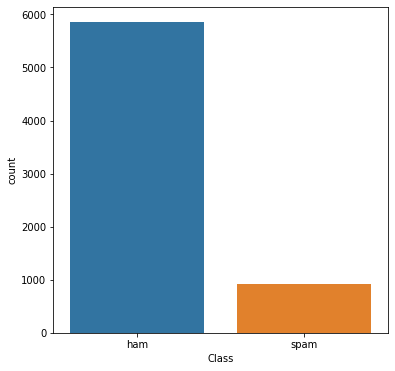

In [24]:

plt.figure(figsize=(6,6))

x= data.Class.value_counts()
sns.countplot(x= "Class",data= data)


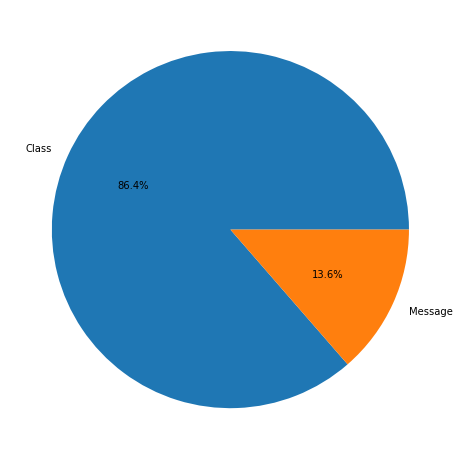

In [25]:
plt.figure(figsize=(8,12))

label= ["Class","Message"]

plt.pie(x.values, labels= label ,autopct= "%1.1f%%") # visualizing using pie
plt.show()   

In [47]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import nltk
import scikitplot as skplt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text


In [52]:
data['clean_text'] = data['Message'].apply(clean_text)
data.head()


,Class,Message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [53]:
X = data['clean_text']
y = data['Class']


In [54]:
# importing the PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
ps=PorterStemmer
words=word_tokenize('clean_text')


LookupError: ignored

In [55]:
#importing the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#lemmatizer=WordNetLemmatizer()

In [56]:
#define a function to get rid of stopwords present in the messages
def message_text_process(mess):
    # Check characters to see if there are punctuations 
    no_punctuation=[char for char in mess if char not in string.punctuation]
    # now form the sentence
    no_punctuation=''.join(no_punctuation)
    # Now eliminate any stopwords
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [57]:
# to verify that function is working
data['Message'].head(5).apply(message_text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [58]:
# start text processing with vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
# bag of words by applying the function and fit the data(message) into it
bag_of_words_transformer=CountVectorizer(analyzer=message_text_process).fit(data['Message'])

In [60]:
# print the length of bag of words stored in vocabulary_attribute
print(len(bag_of_words_transformer.vocabulary_))

11289


In [61]:
#store bag of words for messages using transform method
message_bagofwords=bag_of_words_transformer.transform(data['Message'])

In [62]:
#apply tfidf transformer and fit the bag of words into it(transformed version)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bagofwords)

In [63]:
#print shape of tfidf
message_tfidf=tfidf_transformer.transform(message_bagofwords)
print(message_tfidf.shape)

(6776, 11289)


In [64]:
# choose naive bayes model to detect the spam and fit the tfidf data into it
from sklearn.naive_bayes import MultinomialNB
spam_detection_model=MultinomialNB().fit(message_tfidf,data['Class'])

In [65]:
# check model for prediction and expected value say for message#2 and message#5
message=data['Message'][4]
bag_of_words_for_message=bag_of_words_transformer.transform([message])
tfidf=tfidf_transformer.transform(bag_of_words_for_message)

print('predicted',spam_detection_model.predict(tfidf)[0])

#print('expected',data.response[4])

predicted ham


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [67]:
message=data['Message'][4]
# check model for prediction and expected value say for message#2 and message#5
bag_of_words_for_message=bag_of_words_transformer.transform([message])
tfidf=tfidf_transformer.transform(bag_of_words_for_message)

print('predicted',spam_detection_model.predict(tfidf)[0])
#print('expected',data.label[4])

predicted ham


In [68]:
#importing PCA for the dimensionality reduction 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [69]:
#function for the model building and prediction
def Model(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    


    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)
    



# Model Building

# 1. Logistic Regression

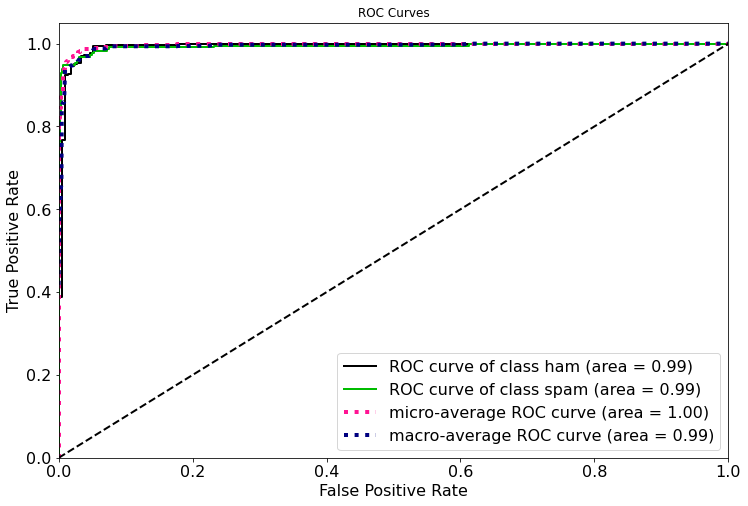

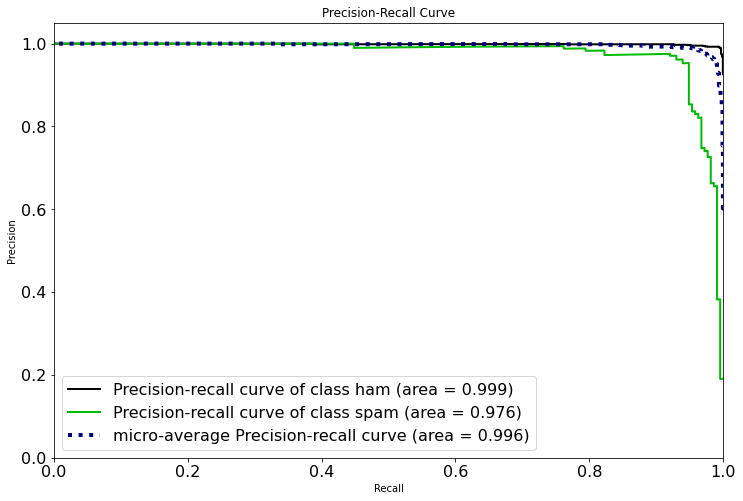

Confusion Matrix:
 [[1477    3]
 [  40  174]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1480
        spam       0.98      0.81      0.89       214

    accuracy                           0.97      1694
   macro avg       0.98      0.91      0.94      1694
weighted avg       0.97      0.97      0.97      1694

Accuracy: 97.4616292798111
Training Score:
 97.40259740259741


In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Model(model, X, y)



**So we get a accuracy score of  97.40 % using LogisticRegression**

# 2. KNeighborsClassifier

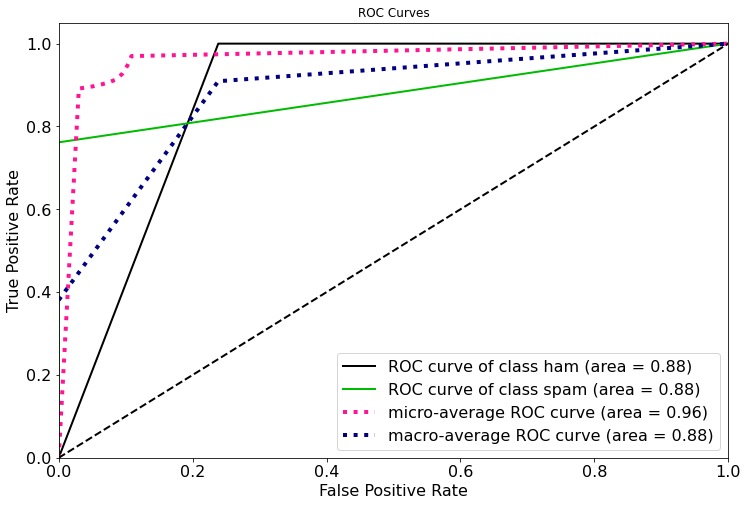

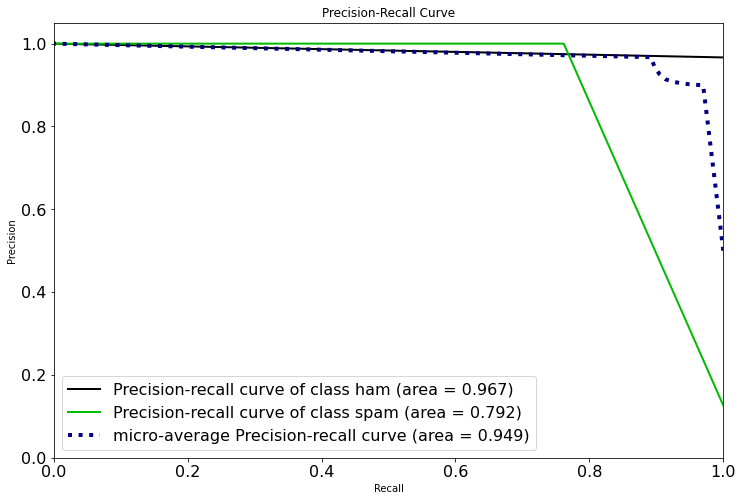

Confusion Matrix:
 [[1480    0]
 [ 146   68]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.91      1.00      0.95      1480
        spam       1.00      0.32      0.48       214

    accuracy                           0.91      1694
   macro avg       0.96      0.66      0.72      1694
weighted avg       0.92      0.91      0.89      1694

Accuracy: 91.38134592680048
Training Score:
 91.16489571035025


In [71]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
Model(model,X,y)


**So we get a accuracy score of 91.38 % using KNeighborsClassifier**

# 3. SVC

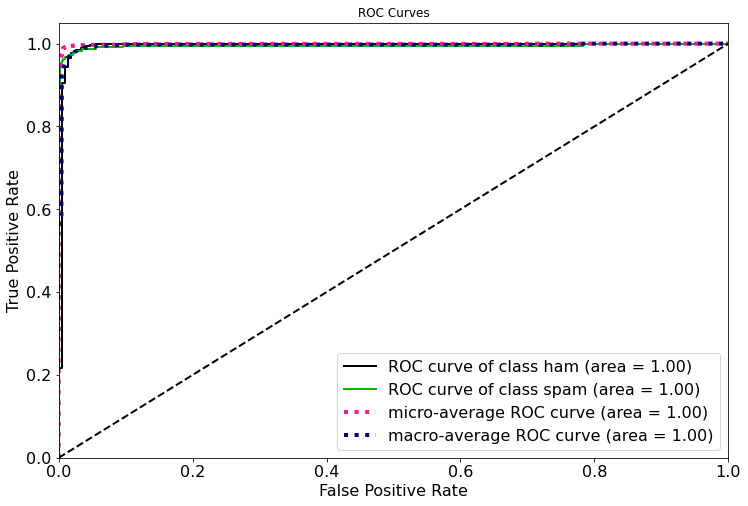

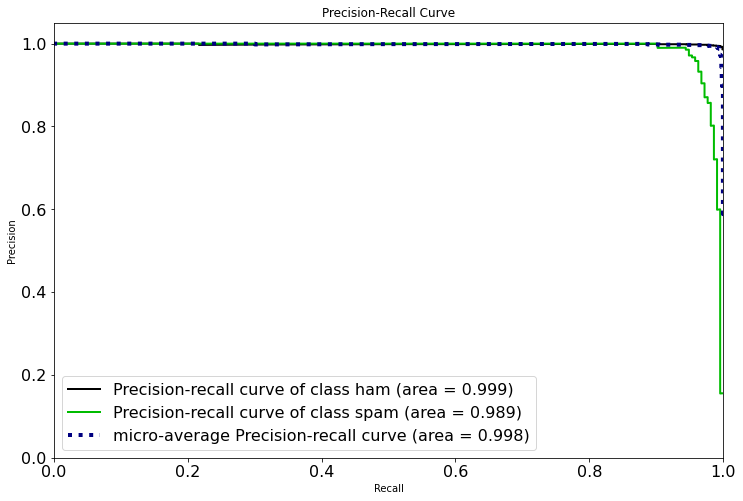

Confusion Matrix:
 [[1478    2]
 [  19  195]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1480
        spam       0.99      0.91      0.95       214

    accuracy                           0.99      1694
   macro avg       0.99      0.95      0.97      1694
weighted avg       0.99      0.99      0.99      1694

Accuracy: 98.7603305785124
Training Score:
 99.86225895316805


In [72]:
from sklearn.svm import SVC
model = SVC(probability=True )
Model(model, X, y)


**So we get a accuracy score of 98.76 % using SVC**

# 4. Naive Bayes

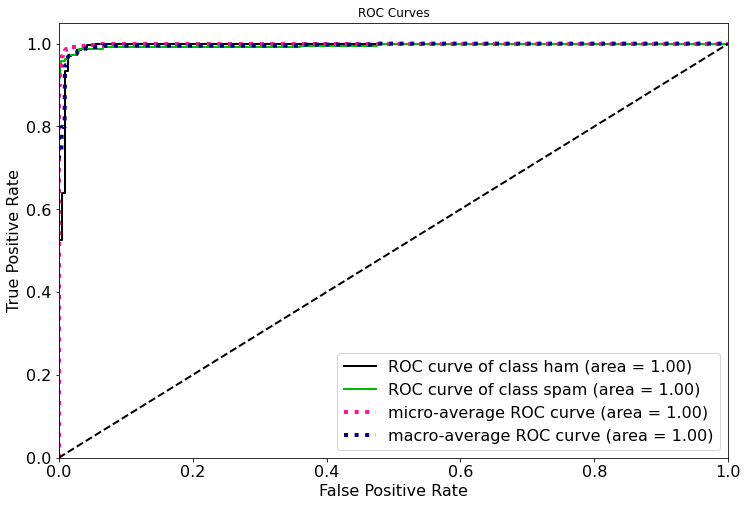

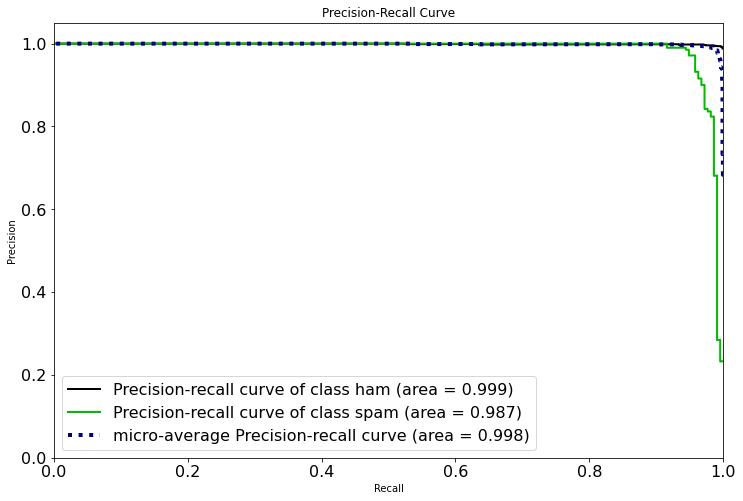

Confusion Matrix:
 [[1480    0]
 [  20  194]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1480
        spam       1.00      0.91      0.95       214

    accuracy                           0.99      1694
   macro avg       0.99      0.95      0.97      1694
weighted avg       0.99      0.99      0.99      1694

Accuracy: 98.8193624557261
Training Score:
 98.99645808736717


In [73]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
Model(model, X, y)

**So we get a accuracy score of 98.81 % using Naive Bayes**

# 5. DECISION TREE CLASSIFIER

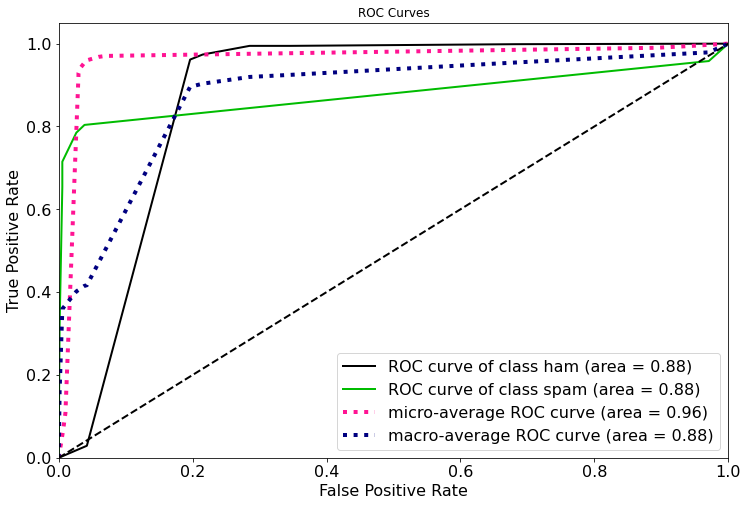

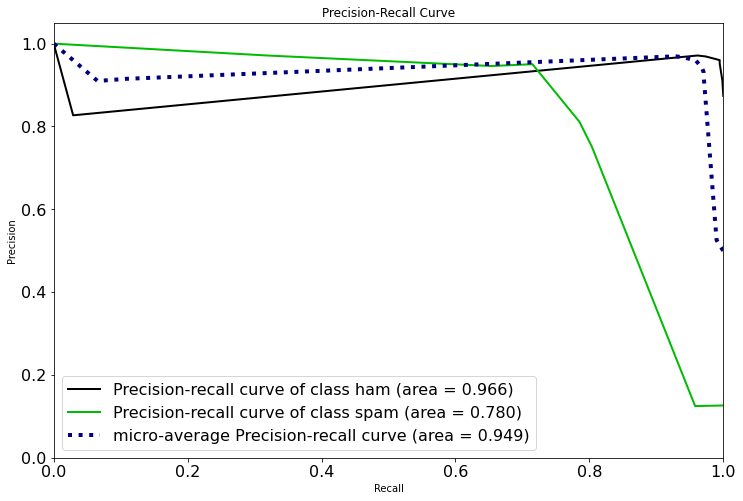

Confusion Matrix:
 [[1472    8]
 [  62  152]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1480
        spam       0.95      0.71      0.81       214

    accuracy                           0.96      1694
   macro avg       0.95      0.85      0.89      1694
weighted avg       0.96      0.96      0.96      1694

Accuracy: 95.86776859504133
Training Score:
 96.39905548996458


In [74]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
Model(tree_clf,X,y)



**So we get a accuracy score of 95.86 % using DecisionTreeClassifier**

# 6. RandomForestClassifier

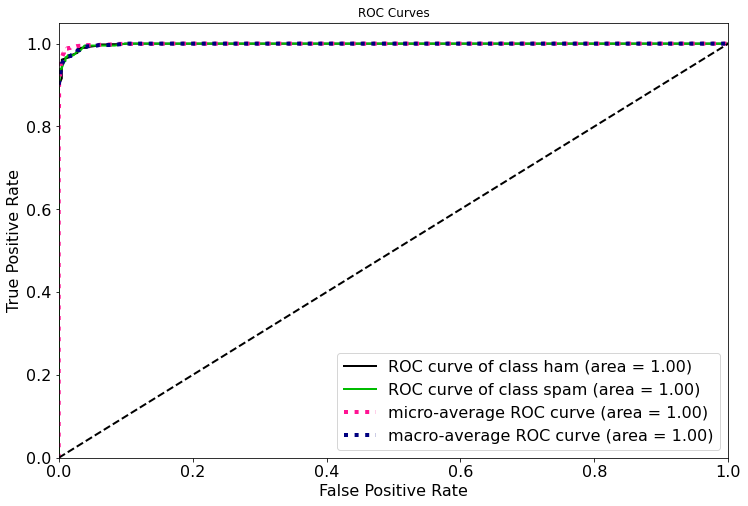

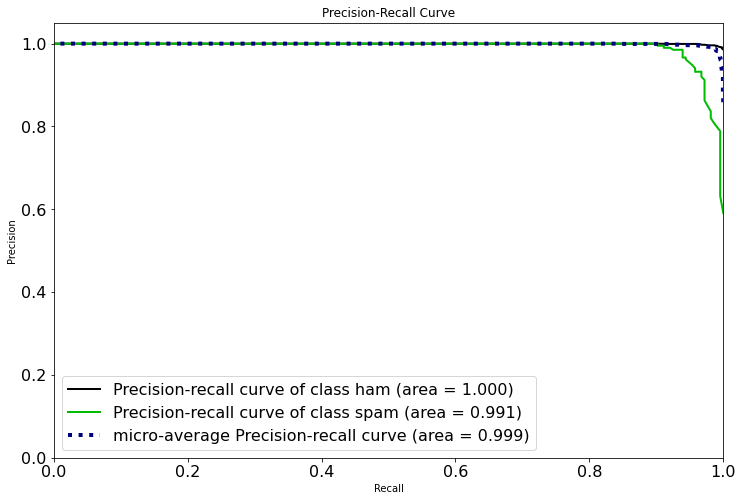

Confusion Matrix:
 [[1479    1]
 [  19  195]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1480
        spam       0.99      0.91      0.95       214

    accuracy                           0.99      1694
   macro avg       0.99      0.96      0.97      1694
weighted avg       0.99      0.99      0.99      1694

Accuracy: 98.8193624557261
Training Score:
 100.0


In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
Model(model, X, y)


**So we get a accuracy score of 98.81 % using RandomForestClassifier**

# 7. AdaBoostClassifier

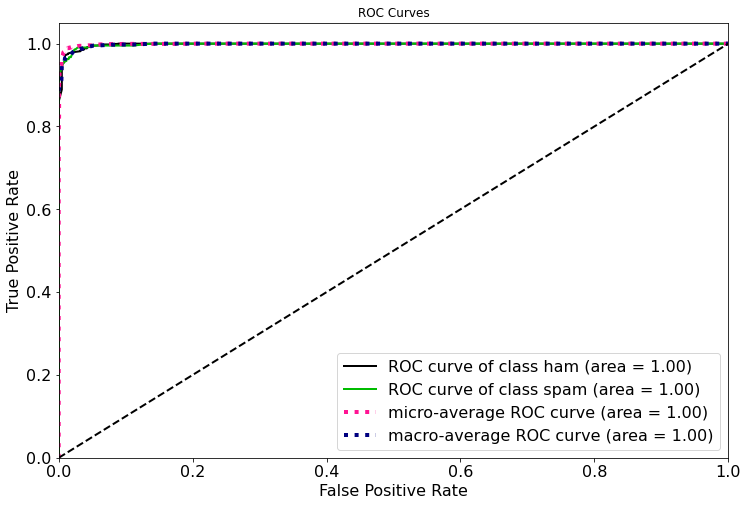

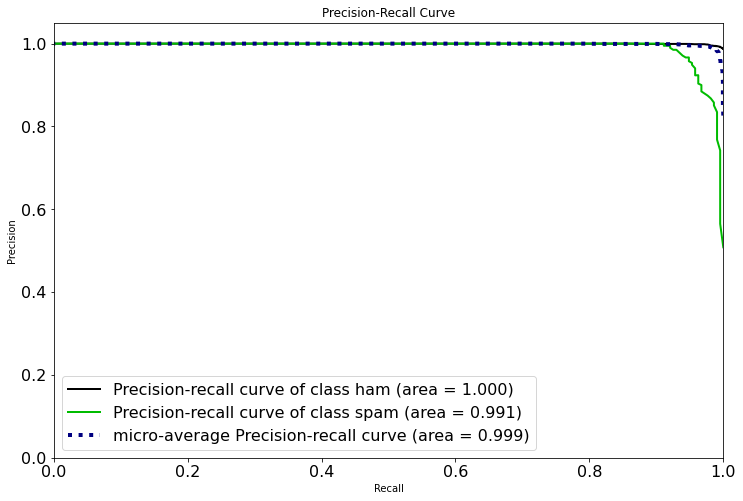

Confusion Matrix:
 [[1480    0]
 [  19  195]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1480
        spam       1.00      0.91      0.95       214

    accuracy                           0.99      1694
   macro avg       0.99      0.96      0.97      1694
weighted avg       0.99      0.99      0.99      1694

Accuracy: 98.87839433293979
Training Score:
 100.0


In [76]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
Model(model, X, y)


**So we get a accuracy score of 98.87 % using AdaBoostClassifier**

# 8. Gradient Boosting Classifier

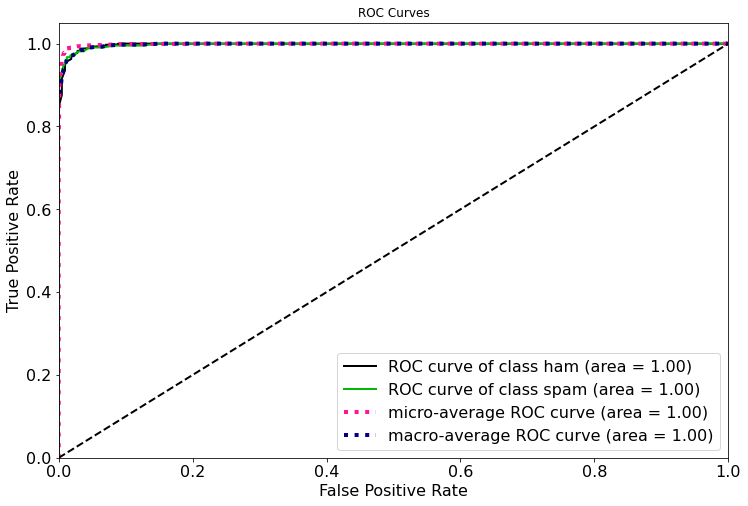

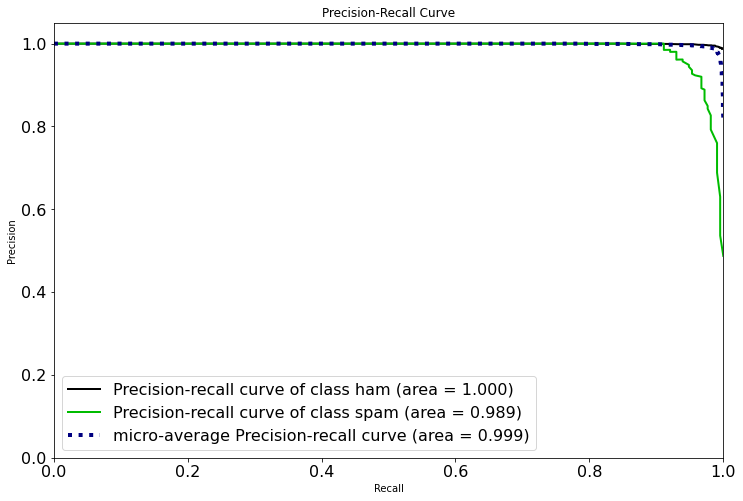

Confusion Matrix:
 [[1480    0]
 [  20  194]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1480
        spam       1.00      0.91      0.95       214

    accuracy                           0.99      1694
   macro avg       0.99      0.95      0.97      1694
weighted avg       0.99      0.99      0.99      1694

Accuracy: 98.8193624557261
Training Score:
 100.0


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
Model(model, X, y)



**So we get a accuracy score of 98.81 % using Gradient Boosting Classifier**

# 9. XGBClassifier

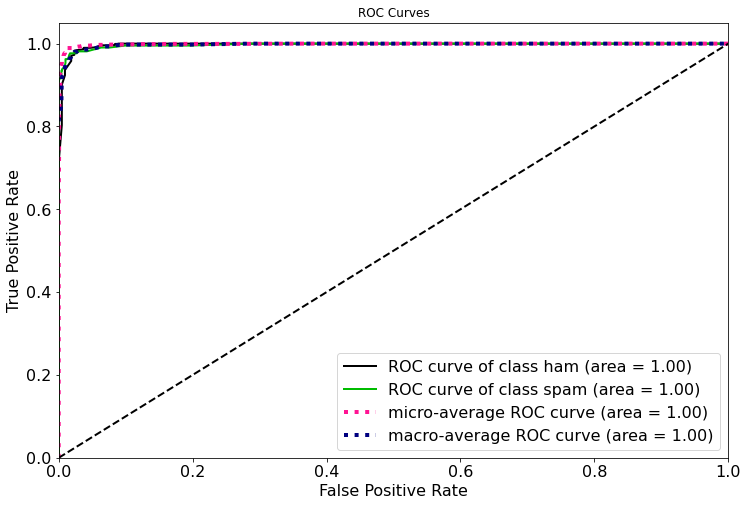

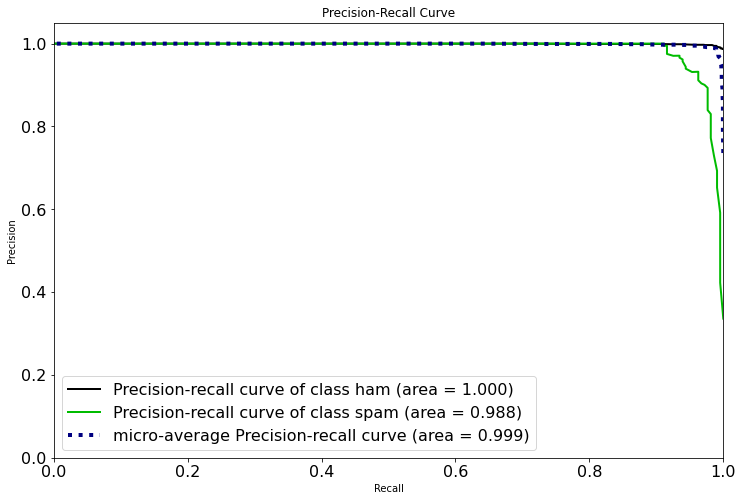

Confusion Matrix:
 [[1480    0]
 [  19  195]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1480
        spam       1.00      0.91      0.95       214

    accuracy                           0.99      1694
   macro avg       0.99      0.96      0.97      1694
weighted avg       0.99      0.99      0.99      1694

Accuracy: 98.87839433293979
Training Score:
 100.0


In [78]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
Model(model, X, y)


**So we get a accuracy score of 98.87 % using XGBClassifier**

# 10. ExtraTreesClassifier

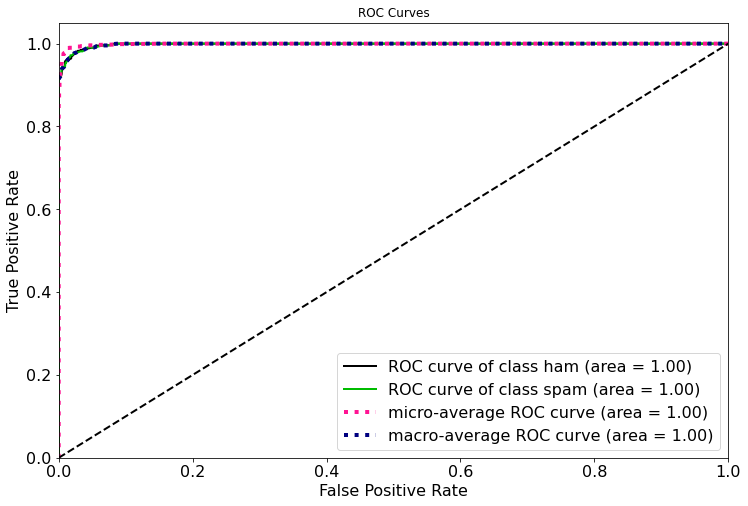

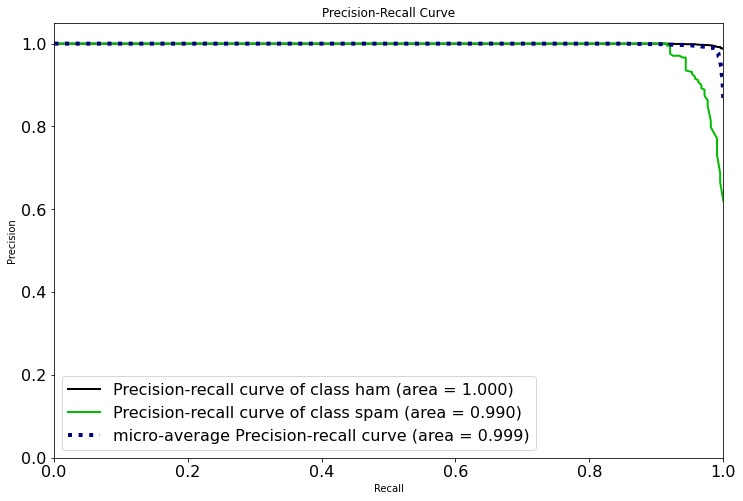

Confusion Matrix:
 [[1480    0]
 [  21  193]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1480
        spam       1.00      0.90      0.95       214

    accuracy                           0.99      1694
   macro avg       0.99      0.95      0.97      1694
weighted avg       0.99      0.99      0.99      1694

Accuracy: 98.7603305785124
Training Score:
 100.0


In [79]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
Model(model,X,y)

**So we get a accuracy score of 98.76 % using ExtraTreesClassifier**

# 11. Bagging Classifier

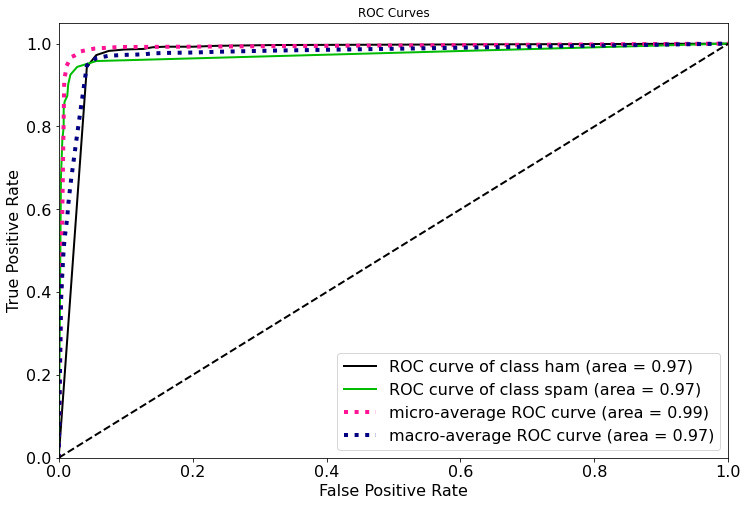

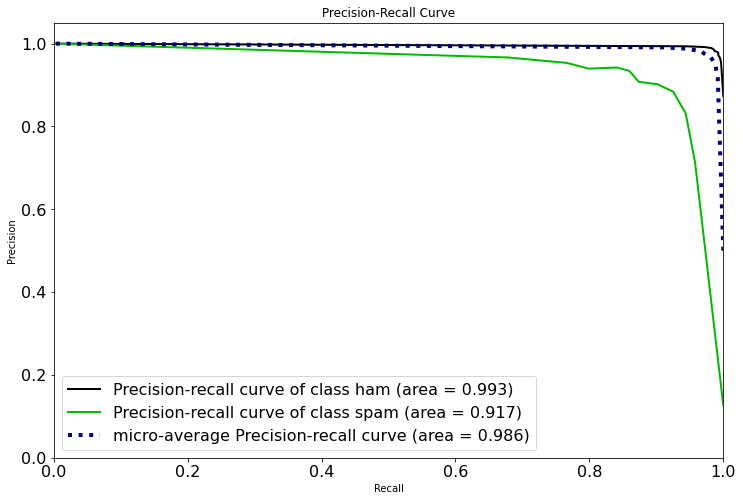

Confusion Matrix:
 [[1467   13]
 [  30  184]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1480
        spam       0.93      0.86      0.90       214

    accuracy                           0.97      1694
   macro avg       0.96      0.93      0.94      1694
weighted avg       0.97      0.97      0.97      1694

Accuracy: 97.4616292798111
Training Score:
 99.62613144431326


In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
Model(model,X,y)

**So we get a accuracy score of 97.46 % using Bagging Classifier**

**Conclusion :**
**We get a good accuracy score of almost 99 % using Random Forest , Ada Boost and Extra Trees Classifier**